In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='3k1NmXn2fW7Wruf4t8qQ85rXpg4Aq4zv5rNafwhRPyIt',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'flightdelayprediction-donotdelete-pr-yswofidmzwspa4'
object_key = 'IBM Dataset.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,0.0,2143,2102.0,-41.0,0.0,0,0,338,295.0,2182
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,0.0,1435,1439.0,4.0,0.0,0,0,110,115.0,528
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,0.0,1215,1142.0,-33.0,0.0,0,0,335,300.0,2182
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,0.0,1335,1345.0,10.0,0.0,0,0,196,205.0,1399
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,0.0,607,615.0,8.0,0.0,0,0,247,259.0,1927


# Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [4]:
data.shape

(11231, 25)

# Handling Missing Values

In [5]:
data.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [6]:
data.dropna()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,0.0,2143,2102.0,-41.0,0.0,0,0,338,295.0,2182
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,0.0,1435,1439.0,4.0,0.0,0,0,110,115.0,528
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,0.0,1215,1142.0,-33.0,0.0,0,0,335,300.0,2182
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,0.0,1335,1345.0,10.0,0.0,0,0,196,205.0,1399
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,0.0,607,615.0,8.0,0.0,0,0,247,259.0,1927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11226,2016,4,12,30,5,DL,N940DL,1715,11433,DTW,...,0.0,1223,1148.0,-35.0,0.0,0,0,138,105.0,594
11227,2016,4,12,30,5,DL,N836DN,1770,14747,SEA,...,1.0,2046,2100.0,14.0,0.0,0,0,201,181.0,1399
11228,2016,4,12,30,5,DL,N583NW,1823,11433,DTW,...,0.0,2210,2154.0,-16.0,0.0,0,0,311,295.0,1927
11229,2016,4,12,30,5,DL,N554NW,1901,10397,ATL,...,0.0,1806,1801.0,-5.0,0.0,0,0,336,332.0,2182


In [7]:
data.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [8]:
data['ARR_TIME'] = np.where(data['ARR_TIME'].isnull(),data['CRS_ARR_TIME'], data['ARR_TIME']) 

In [9]:
data.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME                 0
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [10]:
data['DEP_DELAY'] = np.where(data['DEP_DELAY'].isnull(),0, data['DEP_DELAY']) 

In [11]:
data = data.fillna({'ARR_DEL15':1})
data = data.fillna({'DEP_DEL15':0})
data.iloc[150:170]

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
150,2016,1,1,8,5,DL,N662DN,589,13487,MSP,...,0.0,1100,1102.0,2.0,0.0,0,0,230,235.0,1399
151,2016,1,1,8,5,DL,N914DN,744,13487,MSP,...,1.0,1334,1346.0,12.0,0.0,0,0,149,143.0,907
152,2016,1,1,8,5,DL,N588NW,784,10397,ATL,...,0.0,1040,1009.0,-31.0,0.0,0,0,165,135.0,907
153,2016,1,1,8,5,DL,N318NB,840,13487,MSP,...,0.0,2234,2236.0,2.0,0.0,0,0,103,108.0,528
154,2016,1,1,8,5,DL,N906DA,945,11433,DTW,...,1.0,1555,1626.0,31.0,1.0,0,0,130,116.0,594
155,2016,1,1,8,5,DL,N834DN,987,14747,SEA,...,0.0,615,559.0,-16.0,0.0,0,0,255,244.0,1927
156,2016,1,1,8,5,DL,N834DN,1107,10397,ATL,...,0.0,2205,2142.0,-23.0,0.0,0,0,345,310.0,2182
157,2016,1,1,8,5,DL,N374DA,1145,10397,ATL,...,0.0,1824,1802.0,-22.0,0.0,0,0,124,102.0,594
158,2016,1,1,9,6,DL,N928DN,866,10397,ATL,...,0.0,1538,1510.0,-28.0,0.0,0,0,168,144.0,907
159,2016,1,1,9,6,DL,N702TW,976,10397,ATL,...,0.0,1211,1154.0,-17.0,0.0,0,0,131,119.0,760


In [12]:
import math
for index, row in data.iterrows():
     data.loc[index, 'CRS_ARR_TIME'] = math.floor(row['CRS_ARR_TIME'] / 100)

In [13]:
data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,0.0,21,2102.0,-41.0,0.0,0,0,338,295.0,2182
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,0.0,14,1439.0,4.0,0.0,0,0,110,115.0,528
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,0.0,12,1142.0,-33.0,0.0,0,0,335,300.0,2182
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,0.0,13,1345.0,10.0,0.0,0,0,196,205.0,1399
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,0.0,6,615.0,8.0,0.0,0,0,247,259.0,1927


# Data Visualisation

<AxesSubplot:>

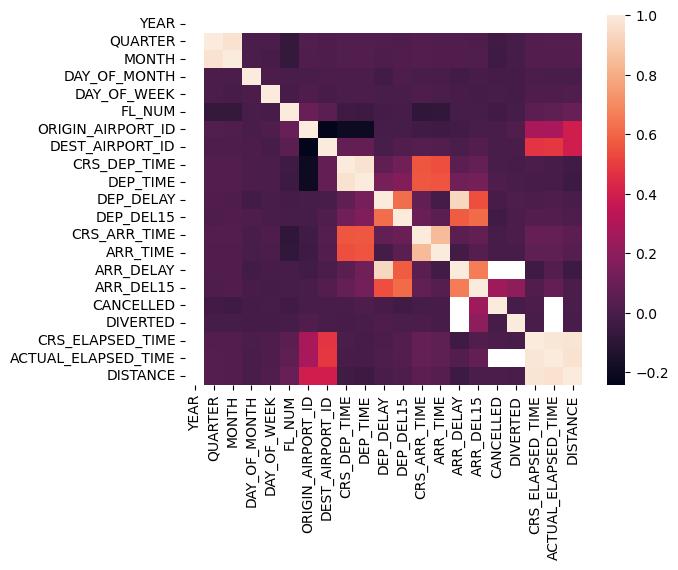

In [14]:
sns.heatmap(data.corr())

### Dropping unnecessary columns

In [15]:
data = data[['FL_NUM', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST', 'CRS_ARR_TIME',  'DEP_DEL15', 'ARR_DEL15']]

In [16]:
data.isnull().sum()

FL_NUM          0
MONTH           0
DAY_OF_MONTH    0
DAY_OF_WEEK     0
ORIGIN          0
DEST            0
CRS_ARR_TIME    0
DEP_DEL15       0
ARR_DEL15       0
dtype: int64

# Encoding

In [17]:
le = LabelEncoder()
data['DEST'] = le.fit_transform(data['DEST'])
data['ORIGIN'] = le.fit_transform(data['ORIGIN'])
data.head(5)

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,0,4,21,0.0,0.0
1,1476,1,1,5,1,3,14,0.0,0.0
2,1597,1,1,5,0,4,12,0.0,0.0
3,1768,1,1,5,4,3,13,0.0,0.0
4,1823,1,1,5,4,1,6,0.0,0.0


# Splitting the dataset into X and Y

In [18]:
data = pd.get_dummies(data, columns = ['ORIGIN', 'DEST'])

In [19]:
data.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15,ORIGIN_0,ORIGIN_1,ORIGIN_2,ORIGIN_3,ORIGIN_4,DEST_0,DEST_1,DEST_2,DEST_3,DEST_4
0,1399,1,1,5,21,0.0,0.0,1,0,0,0,0,0,0,0,0,1
1,1476,1,1,5,14,0.0,0.0,0,1,0,0,0,0,0,0,1,0
2,1597,1,1,5,12,0.0,0.0,1,0,0,0,0,0,0,0,0,1
3,1768,1,1,5,13,0.0,0.0,0,0,0,0,1,0,0,0,1,0
4,1823,1,1,5,6,0.0,0.0,0,0,0,0,1,0,1,0,0,0


In [20]:
x = data.iloc[:, 0:16].values
y = data.iloc[:, 16:17].values

In [21]:
ohe = OneHotEncoder()
z = ohe.fit_transform(x[:,4:5]).toarray()
t = ohe.fit_transform(x[:,5:6]).toarray()

In [22]:
x.shape

(11231, 16)

In [23]:
y.shape

(11231, 1)

# Splitting into Train and Test

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [25]:
x_train.shape

(8984, 16)

In [26]:
y_train.shape

(8984, 1)

In [27]:
x_test.shape

(2247, 16)

In [28]:
y_test.shape

(2247, 1)

In [29]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [31]:
dt = dtc.predict(x_test)
dt

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [32]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, dt)
acc

1.0

In [33]:
from sklearn.metrics import confusion_matrix

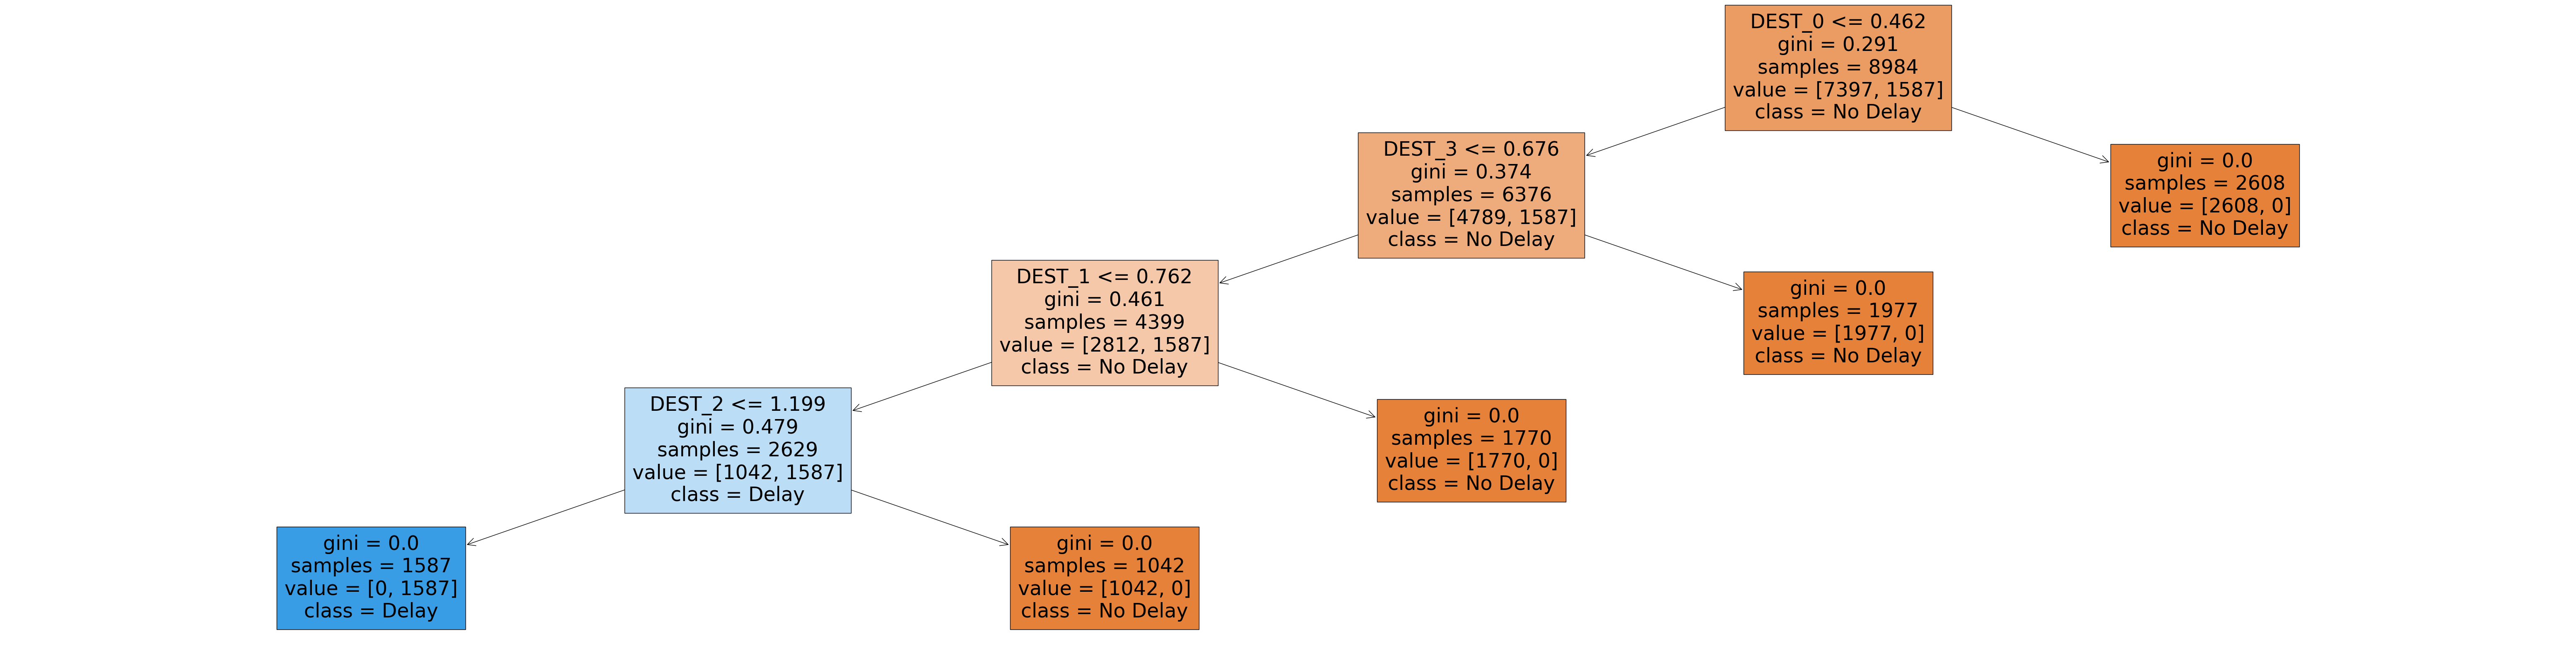

In [41]:
from sklearn import tree
fig = plt.figure(figsize =(80,20))
_ = tree.plot_tree(dtc,
                   feature_names=data.columns,
                   class_names=['No Delay', "Delay"],
                   filled=True)

# plot_tree(dtc, feature_names=x_train.columns, max_depth=2, filled=True);

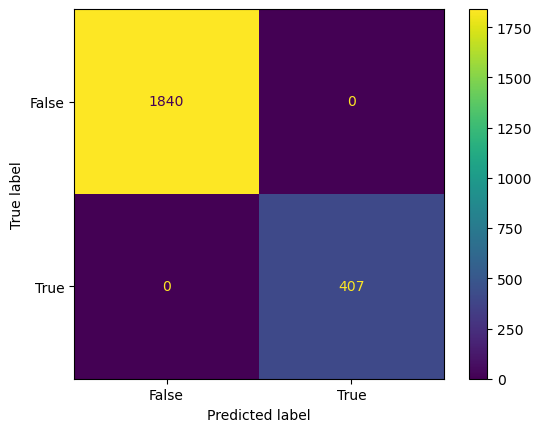

In [39]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, dt)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [46]:
metrics.confusion_matrix(y_test, dt)

array([[1840,    0],
       [   0,  407]])

In [49]:
metrics.classification_report(dt, y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1840\n           1       1.00      1.00      1.00       407\n\n    accuracy                           1.00      2247\n   macro avg       1.00      1.00      1.00      2247\nweighted avg       1.00      1.00      1.00      2247\n'

# Deployment

In [36]:
!pip install ibm_watson_machine_learning

In [37]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey":"mYBrvKJylOO4wCWoS_TesMMELMxEBSW9rQ1NzP0Wn-se"
}
client = APIClient(wml_credentials)

In [38]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [39]:
space_uid = guid_from_space_name(client, 'Model Deployments')
print("Space UID = " + space_uid)

Space UID = a7d2c6d4-d9d1-4499-af3e-2ca88ac57812


In [40]:
client.set.default_space(space_uid) 

'SUCCESS'

In [41]:
model_name = "Decision Tree"
deployment_name= "Model Deployments"
model = dtc

In [42]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [43]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [44]:
model_props ={
    client.repository.ModelMetaNames.NAME : model_name,
    client.repository.ModelMetaNames.TYPE : "scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid
}

In [45]:
model_details = client.repository.store_model(
    model = model,
    meta_props =model_props,
    training_data = x_train,
    training_target =  y_train
)

In [ ]:
model_details

# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(x_train, y_train)

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [51]:
pred_test = lor.predict(x_test)
pred_test

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [52]:
accuracy_score(pred_test, y_test)

1.0

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc_model = RandomForestClassifier(n_estimators=100, random_state=50)
rfc_model.fit(x_train,y_train)

/tmp/wsuser/ipykernel_164/2623879972.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(x_train,y_train)


RandomForestClassifier(random_state=50)

In [55]:
rfc_model.score(x_test, y_test)

1.0

In [56]:
pred_test_rf = rfc_model.predict(x_test)
pred_test_rf

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [57]:
accuracy_score(pred_test_rf, y_test)

1.0